<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Curve-fits-for-the-collisional-rates-in-Xenon" data-toc-modified-id="Curve-fits-for-the-collisional-rates-in-Xenon-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Curve fits for the collisional rates in Xenon</a></span><ul class="toc-item"><li><span><a href="#Electron-collisions" data-toc-modified-id="Electron-collisions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Electron collisions</a></span><ul class="toc-item"><li><span><a href="#Plot-the-momentum-transfer-cross-sections" data-toc-modified-id="Plot-the-momentum-transfer-cross-sections-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Plot the momentum transfer cross-sections</a></span></li><li><span><a href="#Plot-the-average-rate-integrated-over-a-Maxwellian" data-toc-modified-id="Plot-the-average-rate-integrated-over-a-Maxwellian-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Plot the average rate integrated over a Maxwellian</a></span></li><li><span><a href="#Plot-the-$\Omega^{(1,1)}$" data-toc-modified-id="Plot-the-$\Omega^{(1,1)}$-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Plot the $\Omega^{(1,1)}$</a></span></li><li><span><a href="#Plot-the-fit-of-the-rates" data-toc-modified-id="Plot-the-fit-of-the-rates-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Plot the fit of the rates</a></span></li></ul></li><li><span><a href="#Ion-collisions" data-toc-modified-id="Ion-collisions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Ion collisions</a></span><ul class="toc-item"><li><span><a href="#Plot-the-momentum-transfer-cross-sections" data-toc-modified-id="Plot-the-momentum-transfer-cross-sections-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Plot the momentum transfer cross-sections</a></span></li><li><span><a href="#Plot-the-rate-integrated-over-a-Maxwellian" data-toc-modified-id="Plot-the-rate-integrated-over-a-Maxwellian-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Plot the rate integrated over a Maxwellian</a></span></li><li><span><a href="#Plot-the-fit-of-the-rates" data-toc-modified-id="Plot-the-fit-of-the-rates-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Plot the fit of the rates</a></span></li></ul></li></ul></li><li><span><a href="#Reference-values" data-toc-modified-id="Reference-values-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Reference values</a></span></li></ul></div>

# Curve fits for the collisional rates in Xenon

In [1]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.rcParams["font.family"] = 'Times New Roman'
plt.rcParams["font.weight"] = 'normal'
plt.rcParams['figure.facecolor'] = 'white'

import numpy as np

import scipy.constants as phy_const
from scipy import integrate
from scipy import interpolate

from scipy.optimize import curve_fit 
import sys
np.set_printoptions(threshold=np.inf)

plt.rcParams["font.family"]   = 'Times New Roman'
plt.rcParams["font.size"] = 15
plt.rcParams["lines.linewidth"] = 2

We read the collisions used by the PIC simulation. We define the momentum transfer cross-section, as follows

$$ \sigma_m = 2\pi \int^\pi_0  (1 - cos \theta) I(v, \theta) \sin \theta d \theta, $$

where 

$$ I(v, \theta) = \frac{b}{\sin \theta} \left| \frac{db}{d \theta} \right|. $$

Here, $I(v, \theta)$ is the differential cross-section, b is the impact paramiter, and $\theta$ is the scattering angle

We define a class that compute the methods for the cross-section

In [9]:
%matplotlib notebook
import sys  
import os
import numpy as np

# IMPORT PATH TO PYTHONTOOLS MODULE"
sys.path.append('../src/CollisionalData')

import CrossSection as CS

## Electron collisions

In [3]:
# Define the cross-section
sigma_en_el    = CS.CrossSection("Xe-e (Elastic)")
sigma_en_exc_1 = CS.CrossSection("Xe-e (8.315 eV)")
sigma_en_exc_2 = CS.CrossSection("Xe-e (9.447 eV)")
sigma_en_exc_3 = CS.CrossSection("Xe-e (9.917 eV)")
sigma_en_exc_4 = CS.CrossSection("Xe-e (11.7 eV)")
sigma_en_iz    = CS.CrossSection("Xe-e (Ioniz.)")
sigma_ei_el    = CS.CrossSection("e-i", mechanism='e-e', density = 2.974e17, temperature = 3)


# Read the data
sigma_en_el.readData("../src/CollisionalData/CrossSections/XeReducedSet/Xe_e_ELASTIC_CROSS_SECTION.txt")
sigma_en_exc_1.readData("../src/CollisionalData/CrossSections/XeReducedSet/Xe_e_EXCITATION_8_315_CROSS_SECTION.txt")
sigma_en_exc_2.readData("../src/CollisionalData/CrossSections/XeReducedSet/Xe_e_EXCITATION_9_447_CROSS_SECTION.txt")
sigma_en_exc_3.readData("../src/CollisionalData/CrossSections/XeReducedSet/Xe_e_EXCITATION_9_917_CROSS_SECTION.txt")
sigma_en_exc_4.readData("../src/CollisionalData/CrossSections/XeReducedSet/Xe_e_EXCITATION_11_7_CROSS_SECTION.txt")
sigma_en_iz.readData("../src/CollisionalData/CrossSections/XeReducedSet/Xe_e_IONIZATION_12_13_CROSS_SECTION.txt")


### Plot the momentum transfer cross-sections

<IPython.core.display.Javascript object>


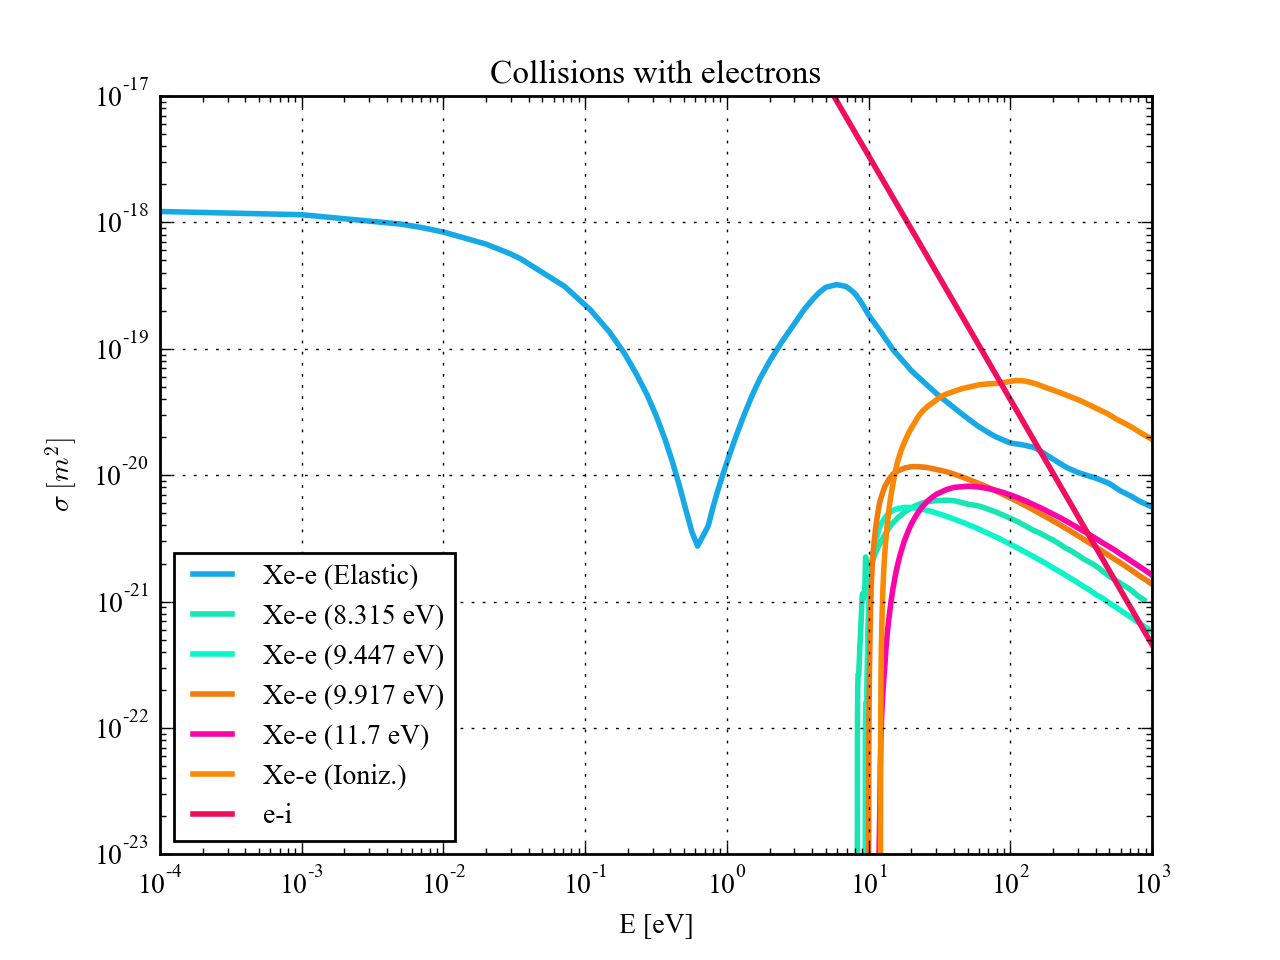

In [10]:
# Plot the data
f, ax = plt.subplots()

sigma_en_el.plotSigma(ax)
sigma_en_exc_1.plotSigma(ax)
sigma_en_exc_2.plotSigma(ax)
sigma_en_exc_3.plotSigma(ax)
sigma_en_exc_4.plotSigma(ax)
sigma_en_iz.plotSigma(ax)
sigma_ei_el.plotSigma(ax)


ax.set_ylabel(r'$\sigma$ $[m^{2}]$')
ax.set_xlabel('E [eV]')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim([1e-23, 1e-17])
plt.legend(loc = 'best', fontsize = 10)
plt.title('Collisions with electrons')

ax.grid(True)

#plt.savefig("/Users/alaguna/Documents/16_PostDoc/77_MomentMethodsPaper/Figures/crossSections_elec.pdf", bbox_inches='tight')

plt.show()




### Plot the average rate integrated over a Maxwellian

We compute the rate as:

$$ K = \left(\frac{m_e}{2\pi k_B T_e} \right)^{3/2} \int^\infty_0 4\pi c_e^2\sigma \exp\left(-\frac{m_e  c_e^2}{2 k_B T_e}\right) dc_{e}. $$

<IPython.core.display.Javascript object>


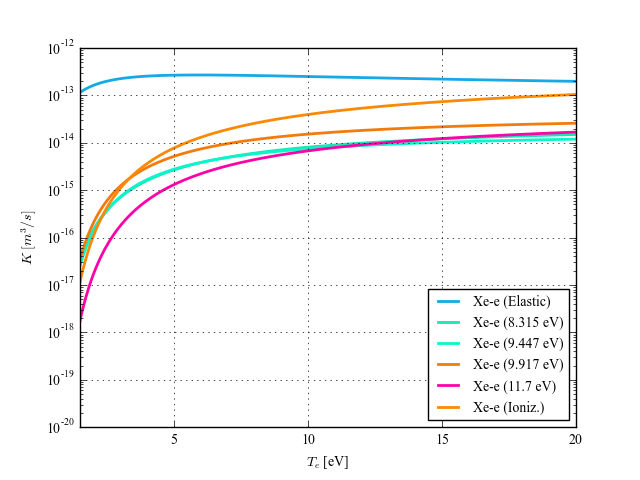

In [15]:
# Compute the rates
sigma_en_el.computeRate()
sigma_en_exc_1.computeRate()
sigma_en_exc_2.computeRate()
sigma_en_exc_3.computeRate()
sigma_en_exc_4.computeRate()
sigma_en_iz.computeRate()
sigma_ei_el.computeRate()



# Plot the data
f, ax = plt.subplots()

sigma_en_el.plotRate(ax)
sigma_en_exc_1.plotRate(ax)
sigma_en_exc_2.plotRate(ax)
sigma_en_exc_3.plotRate(ax)
sigma_en_exc_4.plotRate(ax)
sigma_en_iz.plotRate(ax)

ax.set_ylabel(r'$K$ $[m^{3}/s]$')
ax.set_xlabel(r'$T_e$ [eV]')
ax.set_yscale('log')
ax.set_xlim([1.5, 20])
#ax.set_ylim([1e-16, 1e-12])
plt.legend(loc = 'best', fontsize = 10)
ax.grid(True)

#plt.savefig("/Users/alaguna/Documents/16_PostDoc/77_MomentMethodsPaper/Figures/AverageRate_elec.pdf", bbox_inches='tight')



plt.show()

### Plot the $\Omega^{(1,1)}$

We define the integral as:

$$\Omega^{(l,r)} = \left(\frac{k_B T_e}{2\pi m_e}\right)^{1/2}\int^\infty_0 \xi^{2r+3}\exp(-\xi^2)Q^{(l)}(\xi) d\xi.$$

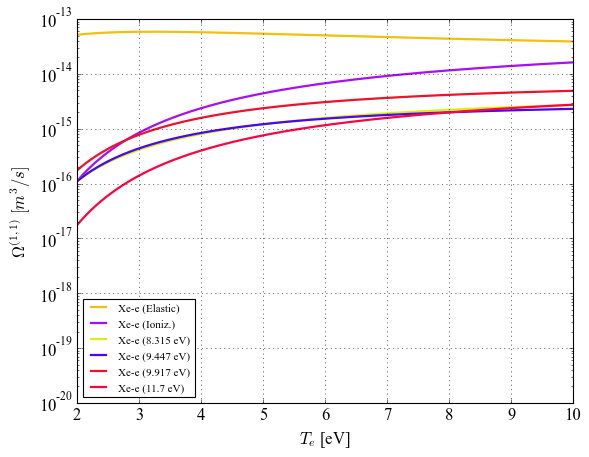

In [7]:
# Compute the rates
sigma_en_el.computeOmega11()
sigma_en_iz.computeOmega11()
sigma_en_exc_1.computeOmega11()
sigma_en_exc_2.computeOmega11()
sigma_en_exc_3.computeOmega11()
sigma_en_exc_4.computeOmega11()



# Plot the data
f, ax = plt.subplots()

sigma_en_el.plotOmega11(ax)
sigma_en_iz.plotOmega11(ax)
sigma_en_exc_1.plotOmega11(ax)
sigma_en_exc_2.plotOmega11(ax)
sigma_en_exc_3.plotOmega11(ax)
sigma_en_exc_4.plotOmega11(ax)

ax.set_ylabel(r'$\Omega^{(1,1)}$ $[m^{3}/s]$')
ax.set_xlabel(r'$T_e$ [eV]')
ax.set_yscale('log')
ax.set_xlim([2, 10])
#ax.set_ylim([1e-16, 1e-12])
plt.legend(loc = 'best', fontsize = 10)
ax.grid(True)
#plt.savefig("/Users/alaguna/Documents/16_PostDoc/77_MomentMethodsPaper/Figures/Omega11_elec.pdf", bbox_inches='tight')



plt.show()


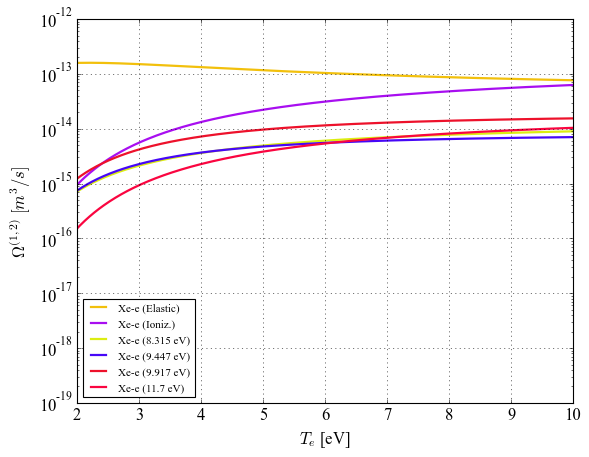

In [8]:
# Compute the rates
sigma_en_el.computeOmega12()
sigma_en_iz.computeOmega12()
sigma_en_exc_1.computeOmega12()
sigma_en_exc_2.computeOmega12()
sigma_en_exc_3.computeOmega12()
sigma_en_exc_4.computeOmega12()



# Plot the data
f, ax = plt.subplots()

sigma_en_el.plotOmega12(ax)
sigma_en_iz.plotOmega12(ax)
sigma_en_exc_1.plotOmega12(ax)
sigma_en_exc_2.plotOmega12(ax)
sigma_en_exc_3.plotOmega12(ax)
sigma_en_exc_4.plotOmega12(ax)

ax.set_ylabel(r'$\Omega^{(1,2)}$ $[m^{3}/s]$')
ax.set_xlabel(r'$T_e$ [eV]')
ax.set_yscale('log')
ax.set_xlim([2, 10])
#ax.set_ylim([1e-16, 1e-12])
plt.legend(loc = 'best', fontsize = 10)
ax.grid(True)
#plt.savefig("/Users/alaguna/Documents/16_PostDoc/77_MomentMethodsPaper/Figures/Omega12_elec.pdf", bbox_inches='tight')



plt.show()


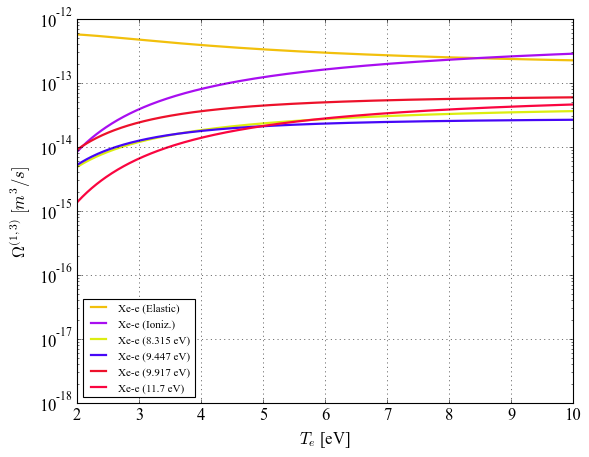

In [9]:
# Compute the rates
sigma_en_el.computeOmega13()
sigma_en_iz.computeOmega13()
sigma_en_exc_1.computeOmega13()
sigma_en_exc_2.computeOmega13()
sigma_en_exc_3.computeOmega13()
sigma_en_exc_4.computeOmega13()



# Plot the data
f, ax = plt.subplots()

sigma_en_el.plotOmega13(ax)
sigma_en_iz.plotOmega13(ax)
sigma_en_exc_1.plotOmega13(ax)
sigma_en_exc_2.plotOmega13(ax)
sigma_en_exc_3.plotOmega13(ax)
sigma_en_exc_4.plotOmega13(ax)

ax.set_ylabel(r'$\Omega^{(1,3)}$ $[m^{3}/s]$')
ax.set_xlabel(r'$T_e$ [eV]')
ax.set_yscale('log')
ax.set_xlim([2, 10])
#ax.set_ylim([1e-16, 1e-12])
plt.legend(loc = 'best', fontsize = 10)
ax.grid(True)
#plt.savefig("/Users/alaguna/Documents/16_PostDoc/77_MomentMethodsPaper/Figures/Omega13_elec.pdf", bbox_inches='tight')



plt.show()

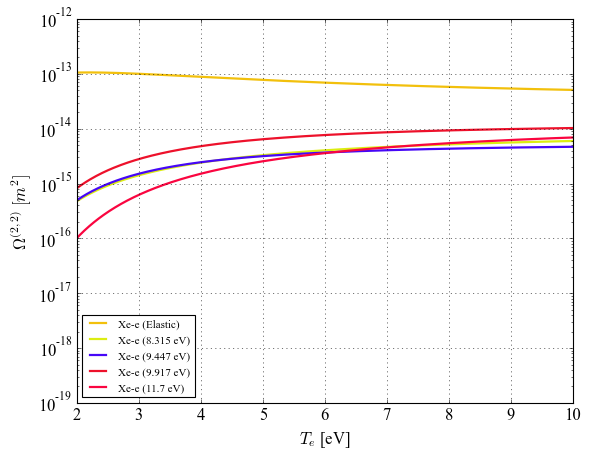

In [10]:
# Compute the rates
sigma_en_el.computeOmega22()
sigma_en_exc_1.computeOmega22()
sigma_en_exc_2.computeOmega22()
sigma_en_exc_3.computeOmega22()
sigma_en_exc_4.computeOmega22()



# Plot the data
f, ax = plt.subplots()

sigma_en_el.plotOmega22(ax)
sigma_en_exc_1.plotOmega22(ax)
sigma_en_exc_2.plotOmega22(ax)
sigma_en_exc_3.plotOmega22(ax)
sigma_en_exc_4.plotOmega22(ax)

ax.set_ylabel(r'$\Omega^{(2,2)}$ $[m^{2}]$')
ax.set_xlabel(r'$T_e$ [eV]')
ax.set_yscale('log')
ax.set_xlim([2, 10])
#ax.set_ylim([1e-16, 1e-12])
plt.legend(loc = 'best', fontsize = 10)

ax.grid(True)

plt.show()


### Plot the fit of the rates

We approximate the rates as:

$$ K, \Omega = AT_e^{-F}\exp\left(-B/T_e + C/T_e^2 - D/T_e^3 + E/T_e^4\right)~[m^3 s^{-1}] $$


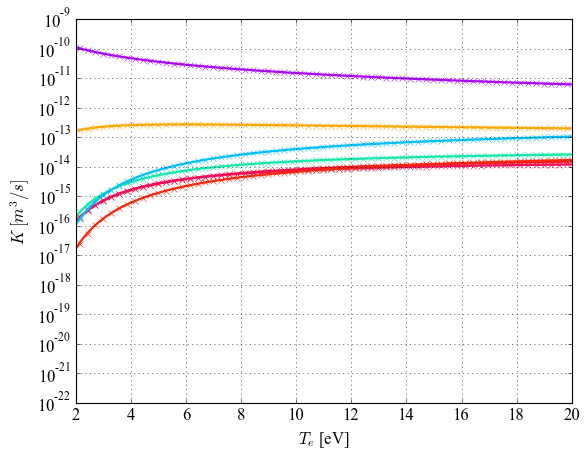

In [17]:
sigma_en_el.fitRate()
sigma_en_exc_1.fitRate()
sigma_en_exc_2.fitRate()
sigma_en_exc_3.fitRate()
sigma_en_exc_4.fitRate()
sigma_en_iz.fitRate()
sigma_ei_el.fitRate()

# Plot the data
f, ax = plt.subplots()

sigma_en_el.plotFitRate(ax)
sigma_en_el.plotRate(ax)
sigma_en_exc_1.plotFitRate(ax)
sigma_en_exc_1.plotRate(ax)
sigma_en_exc_2.plotFitRate(ax)
sigma_en_exc_2.plotRate(ax)
sigma_en_exc_3.plotFitRate(ax)
sigma_en_exc_3.plotRate(ax)
sigma_en_exc_4.plotFitRate(ax)
sigma_en_exc_4.plotRate(ax)
sigma_en_iz.plotFitRate(ax)
sigma_en_iz.plotRate(ax)
sigma_ei_el.plotFitRate(ax)
sigma_ei_el.plotRate(ax)

ax.set_ylabel(r'$K$ $[m^{3}/s]$')
ax.set_xlabel(r'$T_e$ [eV]')
ax.set_yscale('log')
ax.set_xlim([2, 20])
#ax.set_ylim([1e-16, 1e-12])
#plt.legend(loc = 'best', fontsize = 10)

ax.grid(True)

plt.show()

In [18]:
print(sigma_en_el.name,"= \t", sigma_en_el.Coeffs)
print(sigma_en_exc_1.name,"= \t", sigma_en_exc_1.Coeffs)
print(sigma_en_exc_2.name,"= \t", sigma_en_exc_2.Coeffs)
print(sigma_en_exc_3.name,"= \t", sigma_en_exc_3.Coeffs)
print(sigma_en_exc_4.name,"= \t", sigma_en_exc_4.Coeffs)
print(sigma_en_iz.name,"= \t", sigma_en_iz.Coeffs)
print(sigma_ei_el.name,"= \t", sigma_ei_el.Coeffs)

Xe-e (Elastic) = 	 [ 1.40902552e-12  3.41580295e+00 -5.97196965e-01 -9.17813642e-01
  0.00000000e+00  5.99553150e-01]
Xe-e (8.315 eV) = 	 [ 2.44567460e-14  1.29341450e+01  9.02422465e+00  7.64975478e+00
  0.00000000e+00 -4.48373764e-02]
Xe-e (9.447 eV) = 	 [2.63019242e-14 1.07638988e+01 1.04855628e+00 7.38848679e-01
 0.00000000e+00 8.45046004e-02]
Xe-e (9.917 eV) = 	 [5.64375117e-14 1.17850533e+01 2.08677211e+00 1.71469948e+00
 0.00000000e+00 6.51582413e-02]
Xe-e (11.7 eV) = 	 [ 3.42810633e-14  1.90965963e+01  1.38420260e+01  1.40624110e+01
  0.00000000e+00 -7.02445008e-02]
Xe-e (Ioniz.) = 	 [ 6.52356501e-14  1.44018263e+01  3.39482748e+00  2.83614554e+00
  0.00000000e+00 -3.94920920e-01]
e-i = 	 [2.98998625e-10 2.62599099e-01 1.49931948e-01 4.86701119e-02
 0.00000000e+00 1.29423037e+00]


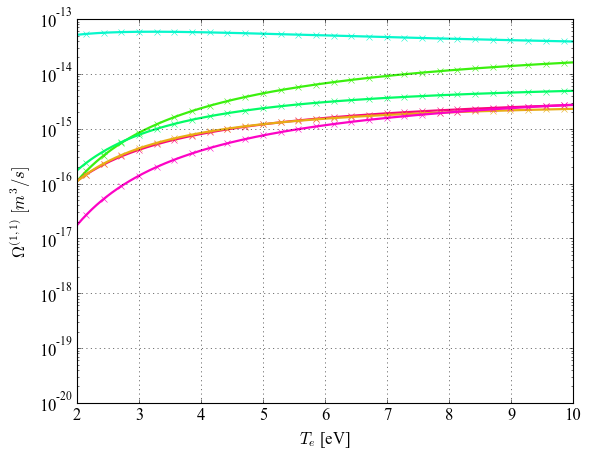

Xe-e (Elastic) = 	 (array([ 6.25621116e-14, -4.30874715e+00, -1.45152836e+01, -1.49229954e+01,
       -5.68651763e+00,  3.36357165e-01]), array([[6.03030771e-31, 4.49290591e-17, 1.13487678e-16, 1.40182121e-16,
        6.28671685e-17, 2.62759337e-18],
       [4.49290591e-17, 3.40545655e-03, 8.77708249e-03, 1.10102190e-02,
        4.99503072e-03, 1.94562780e-04],
       [1.13487678e-16, 8.77708249e-03, 2.32193104e-02, 2.97631030e-02,
        1.37332664e-02, 4.88162376e-04],
       [1.40182121e-16, 1.10102190e-02, 2.97631030e-02, 3.89070431e-02,
        1.82491072e-02, 6.00065504e-04],
       [6.28671685e-17, 4.99503072e-03, 1.37332664e-02, 1.82491072e-02,
        8.68477473e-03, 2.68164535e-04],
       [2.62759337e-18, 1.94562780e-04, 4.88162376e-04, 6.00065504e-04,
        2.68164535e-04, 1.14791142e-05]]))
Xe-e (Ioniz.) = 	 (array([ 2.11609356e-14,  9.69049284e+00, -4.72266685e+00, -5.75992913e+00,
       -2.47718168e+00, -3.23050121e-01]), array([[1.96549243e-33, 7.09062506e-19, 3.781

In [21]:
sigma_en_el.fitOmega11()
sigma_en_iz.fitOmega11()
sigma_en_exc_1.fitOmega11()
sigma_en_exc_2.fitOmega11()
sigma_en_exc_3.fitOmega11()
sigma_en_exc_4.fitOmega11()

# Plot the data
f, ax = plt.subplots()

sigma_en_el.plotFitOmega11(ax)
sigma_en_el.plotOmega11(ax)
sigma_en_iz.plotFitOmega11(ax)
sigma_en_iz.plotOmega11(ax)
sigma_en_exc_1.plotFitOmega11(ax)
sigma_en_exc_1.plotOmega11(ax)
sigma_en_exc_2.plotFitOmega11(ax)
sigma_en_exc_2.plotOmega11(ax)
sigma_en_exc_3.plotFitOmega11(ax)
sigma_en_exc_3.plotOmega11(ax)
sigma_en_exc_4.plotFitOmega11(ax)
sigma_en_exc_4.plotOmega11(ax)

ax.set_ylabel(r'$\Omega^{(1,1)}$ $[m^{3}/s]$')
ax.set_xlabel(r'$T_e$ [eV]')
ax.set_yscale('log')
ax.set_xlim([2, 10])
#ax.set_ylim([1e-16, 1e-12])
#plt.legend(loc = 'best', fontsize = 10)

ax.grid(True)

plt.show()

print(sigma_en_el.name,"= \t", sigma_en_el.CoeffsOmega11)
print(sigma_en_iz.name,"= \t", sigma_en_iz.CoeffsOmega11)
print(sigma_en_exc_1.name,"= \t", sigma_en_exc_1.CoeffsOmega11)
print(sigma_en_exc_2.name,"= \t", sigma_en_exc_2.CoeffsOmega11)
print(sigma_en_exc_3.name,"= \t", sigma_en_exc_3.CoeffsOmega11)
print(sigma_en_exc_4.name,"= \t", sigma_en_exc_4.CoeffsOmega11)


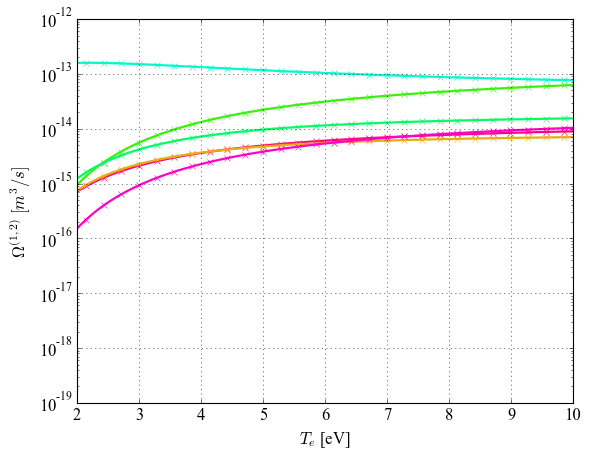

Xe-e (Elastic) = 	 [ 3.11658910e-14 -9.26682423e+00 -1.92606171e+01 -1.70287117e+01
 -5.89183326e+00 -6.43006152e-02]
Xe-e (Ioniz.) = 	 [ 6.71175551e-14  6.98925943e+00 -4.56288967e+00  7.10695818e-01
  4.22203653e+00 -2.93996258e-01]
Xe-e (8.315 eV) = 	 [3.08441272e-14 8.19565163e+00 4.22863824e+00 6.38117264e+00
 3.38715469e+00 1.96435914e-01]
Xe-e (9.447 eV) = 	 [ 1.33965052e-14  2.55058530e+00 -9.42583138e+00 -8.21022497e+00
 -3.06101951e+00  1.31581340e-01]
Xe-e (9.917 eV) = 	 [ 3.27710766e-14  3.48963902e+00 -8.99674372e+00 -8.09022440e+00
 -3.15385350e+00  1.39480788e-01]
Xe-e (11.7 eV) = 	 [5.25348188e-14 1.17730505e+01 2.36437973e+00 5.35036244e+00
 4.19503610e+00 2.00722552e-01]


In [22]:
sigma_en_el.fitOmega12()
sigma_en_iz.fitOmega12()
sigma_en_exc_1.fitOmega12()
sigma_en_exc_2.fitOmega12()
sigma_en_exc_3.fitOmega12()
sigma_en_exc_4.fitOmega12()

# Plot the data
f, ax = plt.subplots()

sigma_en_el.plotFitOmega12(ax)
sigma_en_el.plotOmega12(ax)
sigma_en_iz.plotFitOmega12(ax)
sigma_en_iz.plotOmega12(ax)
sigma_en_exc_1.plotFitOmega12(ax)
sigma_en_exc_1.plotOmega12(ax)
sigma_en_exc_2.plotFitOmega12(ax)
sigma_en_exc_2.plotOmega12(ax)
sigma_en_exc_3.plotFitOmega12(ax)
sigma_en_exc_3.plotOmega12(ax)
sigma_en_exc_4.plotFitOmega12(ax)
sigma_en_exc_4.plotOmega12(ax)

ax.set_ylabel(r'$\Omega^{(1,2)}$ $[m^{3}/s]$')
ax.set_xlabel(r'$T_e$ [eV]')
ax.set_yscale('log')
ax.set_xlim([2, 10])
#ax.set_ylim([1e-16, 1e-12])
#plt.legend(loc = 'best', fontsize = 10)

ax.grid(True)

plt.show()

print(sigma_en_el.name,"= \t", sigma_en_el.CoeffsOmega12[0])
print(sigma_en_iz.name,"= \t", sigma_en_iz.CoeffsOmega12[0])
print(sigma_en_exc_1.name,"= \t", sigma_en_exc_1.CoeffsOmega12[0])
print(sigma_en_exc_2.name,"= \t", sigma_en_exc_2.CoeffsOmega12[0])
print(sigma_en_exc_3.name,"= \t", sigma_en_exc_3.CoeffsOmega12[0])
print(sigma_en_exc_4.name,"= \t", sigma_en_exc_4.CoeffsOmega12[0])


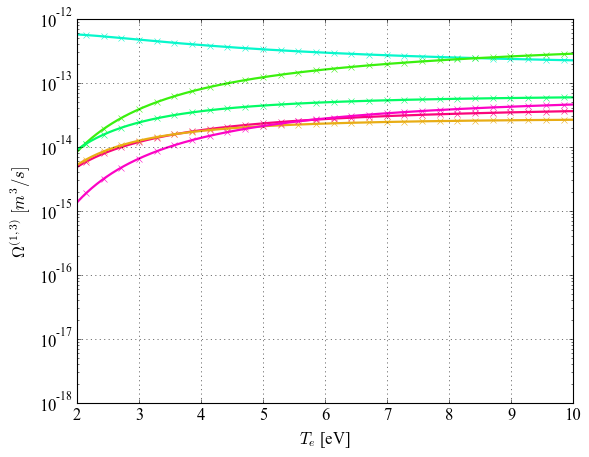

Xe-e (Elastic) = 	 [ 4.86603607e-14 -1.00350397e+01 -1.60974505e+01 -1.19594584e+01
 -3.62984136e+00 -2.96468761e-01]
Xe-e (Ioniz.) = 	 [ 3.23782574e-13  6.63491486e+00  2.06450993e+00  1.48426693e+01
  1.30929332e+01 -2.33535415e-01]
Xe-e (8.315 eV) = 	 [1.16120635e-13 6.59524280e+00 3.03941070e+00 5.09210754e+00
 2.62701345e+00 2.28850326e-01]
Xe-e (9.447 eV) = 	 [ 4.28698966e-14  1.36691618e+00 -6.43506947e+00 -1.92749856e+00
  5.60486900e-01  1.20002411e-01]
Xe-e (9.917 eV) = 	 [ 1.04331510e-13  2.00441786e+00 -6.73027979e+00 -2.54078677e+00
  2.49748632e-01  1.27116958e-01]
Xe-e (11.7 eV) = 	 [ 1.89051829e-13  8.89955525e+00 -8.67003459e-01  1.96414777e+00
  2.20867674e+00  2.21265858e-01]


In [23]:
sigma_en_el.fitOmega13()
sigma_en_iz.fitOmega13()
sigma_en_exc_1.fitOmega13()
sigma_en_exc_2.fitOmega13()
sigma_en_exc_3.fitOmega13()
sigma_en_exc_4.fitOmega13()

# Plot the data
f, ax = plt.subplots()

sigma_en_el.plotFitOmega13(ax)
sigma_en_el.plotOmega13(ax)
sigma_en_iz.plotFitOmega13(ax)
sigma_en_iz.plotOmega13(ax)
sigma_en_exc_1.plotFitOmega13(ax)
sigma_en_exc_1.plotOmega13(ax)
sigma_en_exc_2.plotFitOmega13(ax)
sigma_en_exc_2.plotOmega13(ax)
sigma_en_exc_3.plotFitOmega13(ax)
sigma_en_exc_3.plotOmega13(ax)
sigma_en_exc_4.plotFitOmega13(ax)
sigma_en_exc_4.plotOmega13(ax)

ax.set_ylabel(r'$\Omega^{(1,3)}$ $[m^{3}/s]$')
ax.set_xlabel(r'$T_e$ [eV]')
ax.set_yscale('log')
ax.set_xlim([2, 10])
#ax.set_ylim([1e-16, 1e-12])
#plt.legend(loc = 'best', fontsize = 10)

ax.grid(True)

plt.show()

print(sigma_en_el.name,"= \t", sigma_en_el.CoeffsOmega13[0])
print(sigma_en_iz.name,"= \t", sigma_en_iz.CoeffsOmega13[0])
print(sigma_en_exc_1.name,"= \t", sigma_en_exc_1.CoeffsOmega13[0])
print(sigma_en_exc_2.name,"= \t", sigma_en_exc_2.CoeffsOmega13[0])
print(sigma_en_exc_3.name,"= \t", sigma_en_exc_3.CoeffsOmega13[0])
print(sigma_en_exc_4.name,"= \t", sigma_en_exc_4.CoeffsOmega13[0])

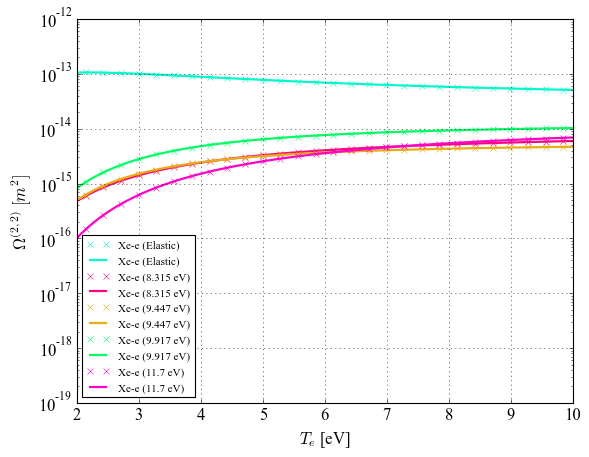

Xe-e (Elastic) = 	 [ 2.07772602e-14 -9.26682432e+00 -1.92606173e+01 -1.70287119e+01
 -5.89183335e+00 -6.43006218e-02]
Xe-e (8.315 eV) = 	 [2.05627568e-14 8.19565332e+00 4.22864530e+00 6.38118713e+00
 3.38716511e+00 1.96435977e-01]
Xe-e (9.447 eV) = 	 [ 8.93100318e-15  2.55058509e+00 -9.42583231e+00 -8.21022695e+00
 -3.06102102e+00  1.31581332e-01]
Xe-e (9.917 eV) = 	 [ 2.18473859e-14  3.48963946e+00 -8.99674182e+00 -8.09022033e+00
 -3.15385036e+00  1.39480804e-01]
Xe-e (11.7 eV) = 	 [3.50232163e-14 1.17730512e+01 2.36438323e+00 5.35037037e+00
 4.19504215e+00 2.00722577e-01]


In [24]:
sigma_en_el.fitOmega22()
sigma_en_exc_1.fitOmega22()
sigma_en_exc_2.fitOmega22()
sigma_en_exc_3.fitOmega22()
sigma_en_exc_4.fitOmega22()
sigma_en_iz.fitRate()

# Plot the data
f, ax = plt.subplots()

sigma_en_el.plotFitOmega22(ax)
sigma_en_el.plotOmega22(ax)
sigma_en_exc_1.plotFitOmega22(ax)
sigma_en_exc_1.plotOmega22(ax)
sigma_en_exc_2.plotFitOmega22(ax)
sigma_en_exc_2.plotOmega22(ax)
sigma_en_exc_3.plotFitOmega22(ax)
sigma_en_exc_3.plotOmega22(ax)
sigma_en_exc_4.plotFitOmega22(ax)
sigma_en_exc_4.plotOmega22(ax)


ax.set_ylabel(r'$\Omega^{(2,2)}$ $[m^{2}]$')
ax.set_xlabel(r'$T_e$ [eV]')
ax.set_yscale('log')
ax.set_xlim([2, 10])
#ax.set_ylim([1e-16, 1e-12])
plt.legend(loc = 'best', fontsize = 10)

ax.grid(True)

plt.show()

print(sigma_en_el.name,"= \t", sigma_en_el.CoeffsOmega22[0])
print(sigma_en_exc_1.name,"= \t", sigma_en_exc_1.CoeffsOmega22[0])
print(sigma_en_exc_2.name,"= \t", sigma_en_exc_2.CoeffsOmega22[0])
print(sigma_en_exc_3.name,"= \t", sigma_en_exc_3.CoeffsOmega22[0])
print(sigma_en_exc_4.name,"= \t", sigma_en_exc_4.CoeffsOmega22[0])

## Ion collisions

### Plot the momentum transfer cross-sections

In [29]:
# Define the cross-section
sigma_Xen_ce    = CS.CrossSection(name="Xe-Xe+ (charge-exchange)", mass=phy_const.m_u*131.293, mechanism="ion-neutral")
sigma_Xen_iso   = CS.CrossSection(name="Xe-Xe+ (isotropic)", mass=phy_const.m_u*131.293, mechanism="ion-neutral")

# Read the data
sigma_Xen_ce.readData("../src/CollisionalData/CrossSections/XeReducedSet/Xe_Xe+_CHARGE_EXCHANGE_CROSS_SECTION.txt")
sigma_Xen_iso.readData("../src/CollisionalData/CrossSections/XeReducedSet/Xe_Xe+_ISOTROPIC_CROSS_SECTION.txt")

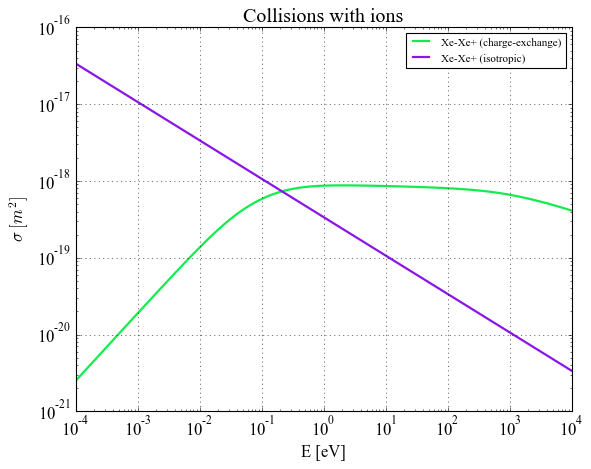

In [30]:
# Plot the data
f, ax = plt.subplots()

sigma_Xen_ce.plotSigma(ax)
sigma_Xen_iso.plotSigma(ax)

ax.set_ylabel(r'$\sigma$ $[m^{2}]$')
ax.set_xlabel('E [eV]')
ax.set_yscale('log')
ax.set_xscale('log')
#ax.set_xlim([1e-4, 1e0])
plt.legend(loc = 'best', fontsize = 10)
plt.title("Collisions with ions")

ax.grid(True)

#plt.savefig("/Users/alaguna/Documents/16_PostDoc/77_MomentMethodsPaper/Figures/crossSections_ion.pdf", bbox_inches='tight')


plt.show()


In [31]:
sigma_Xen_iso.computeOmegaM()
sigma_Xen_ce.computeOmegaM()
sigma_Xen_iso.computeOmegaE()
sigma_Xen_ce.computeOmegaE()


Computing Mach =  0.0


../src/CollisionalData/CrossSection.py:405: RuntimeWarning: divide by zero encountered in log10
  logPsi         = np.log10(psi)


Computing Mach =  1.0
Computing Mach =  2.0
Computing Mach =  3.0
Computing Mach =  4.0
Computing Mach =  5.0
Computing Mach =  6.0
Computing Mach =  7.0
Computing Mach =  8.0
Computing Mach =  9.0
Computing Mach =  10.0
Computing Mach =  11.0
Computing Mach =  12.0
Computing Mach =  13.0
Computing Mach =  14.0
Computing Mach =  15.0
saving the rates for  Xe-Xe+ (isotropic)  in  ./../src/CollisionalData/CrossSections/XeReducedSet/Xe_Xe+_ISOTROPIC_CROSS_SECTION_OmegaM.pkl
Computing Mach =  0.0
Computing Mach =  1.0
Computing Mach =  2.0
Computing Mach =  3.0
Computing Mach =  4.0
Computing Mach =  5.0
Computing Mach =  6.0
Computing Mach =  7.0
Computing Mach =  8.0
Computing Mach =  9.0
Computing Mach =  10.0
Computing Mach =  11.0
Computing Mach =  12.0
Computing Mach =  13.0
Computing Mach =  14.0
Computing Mach =  15.0
saving the rates for  Xe-Xe+ (charge-exchange)  in  ./../src/CollisionalData/CrossSections/XeReducedSet/Xe_Xe+_CHARGE_EXCHANGE_CROSS_SECTION_OmegaM.pkl
Computing Mach

../src/CollisionalData/CrossSection.py:516: RuntimeWarning: divide by zero encountered in log10
  logPsi         = np.log10(psi)


Computing Mach =  1.0
Computing Mach =  2.0
Computing Mach =  3.0
Computing Mach =  4.0
Computing Mach =  5.0
Computing Mach =  6.0
Computing Mach =  7.0
Computing Mach =  8.0
Computing Mach =  9.0
Computing Mach =  10.0
Computing Mach =  11.0
Computing Mach =  12.0
Computing Mach =  13.0
Computing Mach =  14.0
Computing Mach =  15.0
saving the rates for  Xe-Xe+ (isotropic)  in  ./../src/CollisionalData/CrossSections/XeReducedSet/Xe_Xe+_ISOTROPIC_CROSS_SECTION_OmegaE.pkl
Computing Mach =  0.0
Computing Mach =  1.0
Computing Mach =  2.0
Computing Mach =  3.0
Computing Mach =  4.0
Computing Mach =  5.0
Computing Mach =  6.0
Computing Mach =  7.0
Computing Mach =  8.0
Computing Mach =  9.0
Computing Mach =  10.0
Computing Mach =  11.0
Computing Mach =  12.0
Computing Mach =  13.0
Computing Mach =  14.0
Computing Mach =  15.0
saving the rates for  Xe-Xe+ (charge-exchange)  in  ./../src/CollisionalData/CrossSections/XeReducedSet/Xe_Xe+_CHARGE_EXCHANGE_CROSS_SECTION_OmegaE.pkl


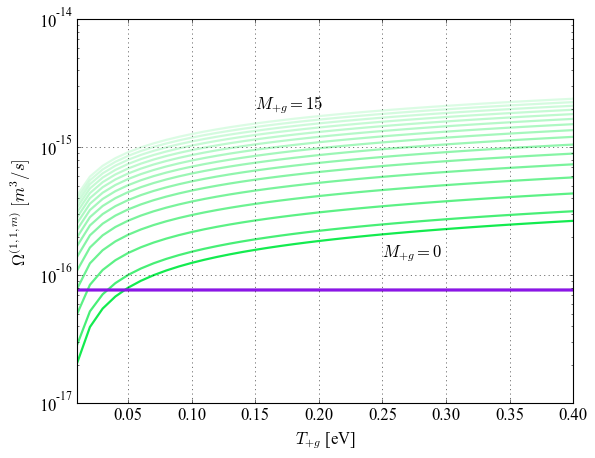

In [40]:
from matplotlib.lines import Line2D

# Plot the data
f, ax = plt.subplots()

for iMach, Mach in enumerate(sigma_Xen_iso.Mach):
    alpha_color = 1. - (iMach/(len(sigma_Xen_iso.Mach)*1.3))**0.5
    ax.plot(sigma_Xen_ce.Temperature[:],  sigma_Xen_ce.OmegaM[iMach,:], color=sigma_Xen_ce.Color, alpha = alpha_color)
    ax.plot(sigma_Xen_iso.Temperature[:], sigma_Xen_iso.OmegaM[iMach,:], color=sigma_Xen_iso.Color, alpha = alpha_color)
    
ax.text(0.15, 2e-15, r'$M_{+g} = %2.f$'%sigma_Xen_iso.Mach[-1])#, color=sigma_Xen_ce.Color, alpha = alpha_color+0.2)
ax.text(0.25, 1.4e-16, r'$M_{+g} = 0$')#, color=sigma_Xen_ce.Color)

#custom_lines = [Line2D([0], [0], color=sigma_Xen_iso.Color, lw=2),
#                Line2D([0], [0], color=sigma_Xen_ce.Color, lw=2)]

#ax.legend(custom_lines, ['Isotropic', 'Charge-exchange'],loc = 'best', fontsize = 10)
#plt.title("Interpolation")

ax.set_ylabel(r'$\Omega^{(1,1,m)}$ $[m^{3}/s]$')
ax.set_xlabel(r'$T_{+g}$ [eV]')
ax.set_yscale('log')
ax.set_xlim([1e-2, 0.4])
ax.grid(True)
#plt.savefig("/Users/alaguna/Documents/16_PostDoc/77_MomentMethodsPaper/Figures/Omega11m_ions.pdf", bbox_inches='tight')
plt.show()



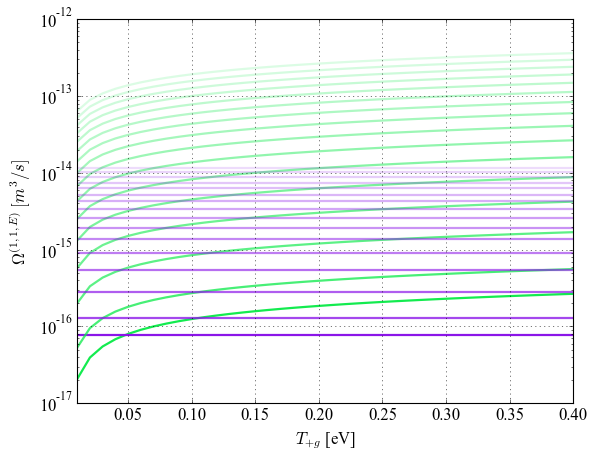

In [41]:
# Plot the data
f, ax = plt.subplots()

for iMach, Mach in enumerate(sigma_Xen_iso.Mach):
    alpha_color = 1. - (iMach/(len(sigma_Xen_iso.Mach)*1.3))**0.5
    ax.plot(sigma_Xen_ce.Temperature[:],  sigma_Xen_ce.OmegaE[iMach,:], color=sigma_Xen_ce.Color, alpha = alpha_color)
    ax.plot(sigma_Xen_iso.Temperature[:], sigma_Xen_iso.OmegaE[iMach,:], color=sigma_Xen_iso.Color, alpha = alpha_color)
     
#ax.text(0.15, 2e-15, r'$M_{+g} = 12$')#, color=sigma_Xen_ce.Color, alpha = alpha_color+0.2)
#ax.text(0.25, 1.4e-16, r'$M_{+g} = 0$')#, color=sigma_Xen_ce.Color)

#custom_lines = [Line2D([0], [0], color=sigma_Xen_iso.Color, lw=2),
#                Line2D([0], [0], color=sigma_Xen_ce.Color, lw=2)]

#ax.legend(custom_lines, ['Isotropic', 'Charge-exchange'],loc = 'best', fontsize = 10)
#plt.title("Interpolation")

ax.set_ylabel(r'$\Omega^{(1,1,E)}$ $[m^{3}/s]$')
ax.set_xlabel(r'$T_{+g}$ [eV]')
ax.set_yscale('log')
ax.set_xlim([1e-2, 0.4])
ax.grid(True)
#plt.savefig("/Users/alaguna/Documents/16_PostDoc/77_MomentMethodsPaper/Figures/Omega11m_ions.pdf", bbox_inches='tight')
plt.show()




In [34]:
sigma_Xen_ce.fitOmegaM()
sigma_Xen_iso.fitOmegaM()

print(sigma_Xen_iso.CoeffsOmegaM)
print(sigma_Xen_ce.CoeffsOmegaM)
print(sigma_Xen_iso.CoeffsOmegaE)
print(sigma_Xen_ce.CoeffsOmegaE)


saving the coefficients for  Xe-Xe+ (charge-exchange) in  ./../src/CollisionalData/CrossSections/XeReducedSet/Xe_Xe+_CHARGE_EXCHANGE_CROSS_SECTION_fitOmegaM.pkl
saving the coefficients for  Xe-Xe+ (isotropic) in  ./../src/CollisionalData/CrossSections/XeReducedSet/Xe_Xe+_ISOTROPIC_CROSS_SECTION_fitOmegaM.pkl
[array([ 7.70595798e-17, -7.84683608e-08, -5.34881386e-10, -5.08942233e-07]), array([ 7.70595912e-17, -6.32380805e-08, -3.85968688e-10, -5.06919692e-07]), array([ 7.70595897e-17,  1.22940971e-08,  1.79396890e-10, -8.76590469e-08]), array([7.70595703e-17, 7.77209475e-08, 6.29971940e-10, 4.00706293e-07]), array([7.70595703e-17, 6.13819814e-08, 4.85374256e-10, 3.43756354e-07]), array([7.70595580e-17, 5.09243803e-08, 3.02489272e-10, 4.16738025e-07]), array([7.70595222e-17, 7.89501536e-08, 4.24017502e-10, 8.06390640e-07]), array([7.70595094e-17, 5.22785704e-08, 2.26614786e-10, 7.40474040e-07]), array([ 7.70595078e-17,  1.05281188e-08, -9.99656111e-11,  5.23230061e-07]), array([ 7.705950

### Plot the rate integrated over a Maxwellian

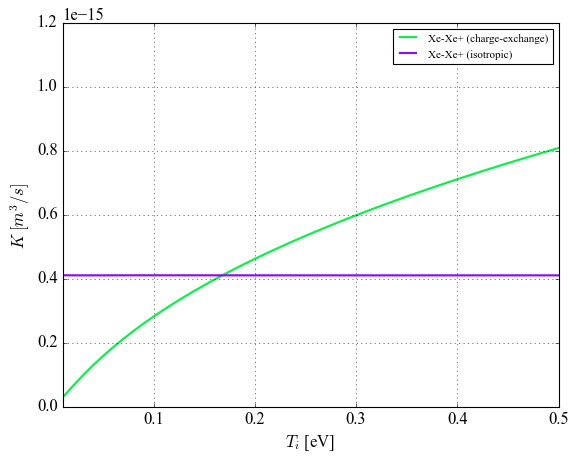

In [35]:
# Compute the rates
sigma_Xen_ce.computeRate()
sigma_Xen_iso.computeRate()


# Plot the data
f, ax = plt.subplots()

sigma_Xen_ce.plotRate(ax)
sigma_Xen_iso.plotRate(ax)


ax.set_ylabel(r'$K$ $[m^{3}/s]$')
ax.set_xlabel(r'$T_i$ [eV]')
#ax.set_yscale('log')
ax.set_xlim([1e-2, 0.5])
# ax.set_ylim([1e-16, 1e-12])
plt.legend(loc = 'best', fontsize = 10)

ax.grid(True)

plt.show()

### Plot the fit of the rates

$$ K, \Omega = AT_e^{D}\exp\left(-B/T_e + C/T_e^2\right)~[m^3 s^{-1}] $$


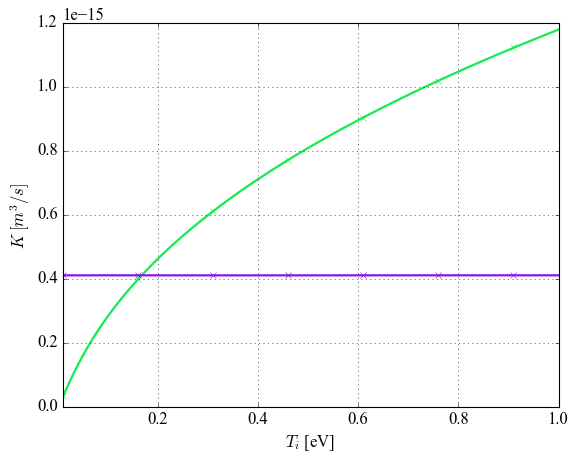

Xe-Xe+ (charge-exchange) = 	 1.2189806241306723e-15
Xe-Xe+ (isotropic) = 	 4.115035836561176e-16


In [36]:
sigma_Xen_ce.fitRate()
sigma_Xen_iso.fitRate()

# Plot the data
f, ax = plt.subplots()

sigma_Xen_ce.plotFitRate(ax)
sigma_Xen_ce.plotRate(ax)
sigma_Xen_iso.plotFitRate(ax)
sigma_Xen_iso.plotRate(ax)

ax.set_ylabel(r'$K$ $[m^{3}/s]$')
ax.set_xlabel(r'$T_i$ [eV]')
#ax.set_yscale('log')
ax.set_xlim([1.e-2, 1.])
#ax.set_ylim([1e-16, 1e-12])
#plt.legend(loc = 'best', fontsize = 10)

ax.grid(True)

plt.show()

print(sigma_Xen_ce.name,"= \t", sigma_Xen_ce.Coeffs[0])
print(sigma_Xen_iso.name,"= \t", sigma_Xen_iso.Coeffs[0])


# Reference values

In [28]:
m_e  = phy_const.m_e
m_Xep = phy_const.m_u*131.293

pn_mTorr = 3 # mTorr
pn_Pa    = 0.13332237*pn_mTorr
Tn       = 300 # K
L        = 3e-2 #m

ne       = 1e16 # m^3
Te_eV    = 4.51 # eV
Te_K     = 4.51*phy_const.e/phy_const.Boltzmann
Ti_K     = Tn

nn       = pn_Pa/(phy_const.Boltzmann*Tn)

u_Bohm   = np.sqrt(phy_const.Boltzmann*Te_K/m_Xep)
Debye    = np.sqrt(phy_const.epsilon_0*phy_const.Boltzmann*Te_K/(phy_const.e**2*ne))

plasmaFreq = 2*np.pi*np.sqrt(abs(ne*phy_const.e**2/(m_e*phy_const.epsilon_0)))

NBCELLS   = 400
Dx        = 300/NBCELLS
TermVel_e = np.sqrt(2*phy_const.e*Te_eV/m_e)
Dt        = Dx/TermVel_e

t_0      = L/u_Bohm

print("p_gas     = ", pn_mTorr, "mTorr")
print("omega_RF  = ", 8.51999927654e7)
print("Mass_Xe   = ", phy_const.m_u*131.293, "Kg")
print("T_gas     = ", Tn, "K")
print("n_gas     = ", nn, "m^3")
print("L         = ", L, "m")
print("ne        = ", ne, "m")
print("Te        = ", Te_eV, "eV")
print("Te        = ", Te_K, "K")
print("u_Bohm    = ", u_Bohm, "m/s")
print("t_0       = ", t_0,"s")
print("Debye     = ", Debye, "m" )
print("rho_0     = ",ne*m_Xep, "kg/m3")
print("Ref Power = ",ne*phy_const.e*Te_eV*L**3/t_0, "W")
print("Ref Power = ",phy_const.e*ne*u_Bohm*Te_eV/L*L**3, "W")
print("Ref E     = ",Te_eV/L,"V/m")
print()
print()
print("Mass Ratio  = ", m_e/m_Xep)
print("L/Debye     = ", L/Debye)
print("kappa       = ", Tn/Te_K)
#print("nu_in*t0    = ", np.mean(sigma_Xen_iso.K)*nn*t_0)
print("plasma freq = ", plasmaFreq)

print()
print("Dt_plasmaWave = ", 1./plasmaFreq)
print("Dt_Thermal    = ", Dt)
print()
print("omega_RF*t0   = ", 8.51999927654e7*t_0) 
print("T_RF          = ", (2*np.pi/8.51999927654e7)/t_0)


p_gas     =  3 mTorr
omega_RF  =  85199992.7654
Mass_Xe   =  2.180171556711138e-25 Kg
T_gas     =  300 K
n_gas     =  9.65649995038565e+19 m^3
L         =  0.03 m
ne        =  1e+16 m
Te        =  4.51 eV
Te        =  52336.37672819086 K
u_Bohm    =  1820.5312289421613 m/s
t_0       =  1.6478706612152878e-05 s
Debye     =  0.00015787284631892074 m
rho_0     =  2.180171556711138e-09 kg/m3
Ref Power =  0.011839342329105967 W
Ref Power =  0.011839342329105967 W
Ref E     =  150.33333333333334 V/m


Mass Ratio  =  4.178287563407079e-06
L/Debye     =  190.0263452487368
kappa       =  0.005732150728699676
plasma freq =  35446340035.592064

Dt_plasmaWave =  2.821165736704802e-11
Dt_Thermal    =  5.954527366284279e-07

omega_RF*t0   =  1403.9856841385745
T_RF          =  0.004475248842038358
